In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import tensorflow as tf


In [2]:
# data from https://github.com/zeeshannisar/COVID-19/blob/master/Implementations/dataset%2002/DenseNet169-Transfer%20Learning-COVID19-dataset%2002.ipynb
dataDir = 'covid_data'
train_x = np.load(dataDir+'/train_images.npy')
train_y = np.load(dataDir+'/train_labels.npy')
test_x = np.load(dataDir+'/test_images.npy')
test_y = np.load(dataDir+'/test_labels.npy')


print('Training Images: {} | Test Images: {}'.format(train_x.shape, test_x.shape))
print('Training Labels: {} | Test Labels: {}'.format(train_y.shape, test_y.shape))

# Data Normalization

print('Train: {} , {} | Test: {} , {}'.format(train_x.min(), train_x.max(), test_x.min(), test_x.max()))

train_x/=255.0
test_x/=255.0

print('Train: {} , {} | Test: {} , {}'.format(train_x.min(), train_x.max(), test_x.min(), test_x.max()))

Training Images: (14925, 224, 224, 3) | Test Images: (231, 224, 224, 3)
Training Labels: (14925,) | Test Labels: (231,)
Train: 0.0 , 255.0 | Test: 0.0 , 255.0
Train: 0.0 , 1.0 | Test: 0.0 , 1.0


In [3]:
# Class Mapping 
print('0:Normal | 1:Pneumonia | 2:COVID-19')

# Distribution of images in each class for Training-set
print(Counter(train_y))

# Distribution of images in each class for Test-set
print(Counter(test_y))

#Make Labels Categorical
train_y_oneHot = tf.one_hot(train_y, depth=3) 
test_y_oneHot = tf.one_hot(test_y, depth=3)

print('Training Labels: {} | Test Labels: {}'.format(train_y_oneHot.shape, test_y_oneHot.shape))

0:Normal | 1:Pneumonia | 2:COVID-19
Counter({0: 8751, 1: 5945, 2: 229})
Counter({0: 100, 1: 100, 2: 31})
Training Labels: (14925, 3) | Test Labels: (231, 3)


In [4]:
my_dict = {'Image_Index': [],
           'Finding_Labels': []}

for i in range(len(test_y)):
    my_dict['Image_Index'].append(i)
    my_dict['Finding_Labels'].append(test_y[i])



In [5]:
df = pd.DataFrame.from_dict(my_dict)
df.dtypes
df.head()

,Image_Index,Finding_Labels
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [6]:
df.describe()

,Image_Index,Finding_Labels
count,231.000000,231.000000
mean,115.000000,0.701299
std,66.828138,0.692788
min,0.000000,0.000000
25%,57.500000,0.000000
50%,115.000000,1.000000
75%,172.500000,1.000000
max,230.000000,2.000000


<AxesSubplot:>

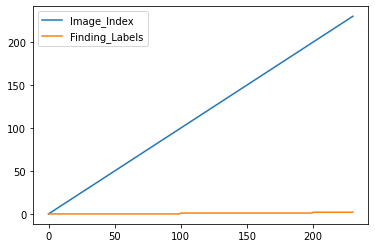

In [7]:
df.plot() #kind='hist'

In [8]:
import glob
import matplotlib.image as mpimg
from skimage.transform import resize

In [49]:
# convert numpy arrays and save as images

# from PIL import Image
# test_x.shape
# # plt.imshow(test_x[219])

# for i in range(len(test_y)):
#     im = Image.fromarray((test_x[i]*255).astype(np.uint8))
#     im.save(f'./covid_data/test_images/{i}.png')
# print("complete")

In [9]:
all_imgs_flat = test_x.reshape((len(test_x), 224*224*3))

In [10]:
from sklearn.manifold import TSNE
import os

In [11]:
model = TSNE(n_components=2, init='pca') #, method='exact')
X_embedded = model.fit_transform(all_imgs_flat)

print(X_embedded.shape)

(231, 2)


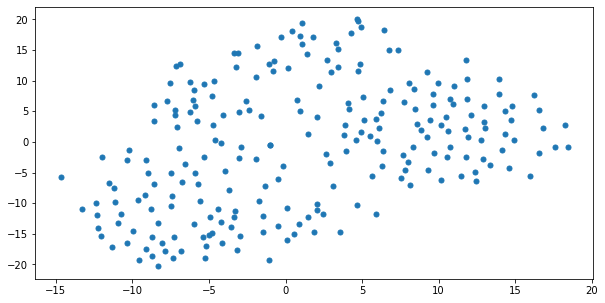

In [12]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(X_embedded[:,0], X_embedded[:,1], s=25)

In [13]:
df.columns

Index(['Image_Index', 'Finding_Labels'], dtype='object')

In [14]:
print(len(df))
data_range = len(test_y)
images = "./covid_data/test_images"
img_fns = glob.glob(images + "/*.png")


231


In [15]:
import re

# natural key sorting for the images
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_key(img_fns):
    return [ atoi(c) for c in re.split(r'(\d+)', img_fns) ]

img_fns.sort(key = natural_key)

In [16]:
df['x_val'] = pd.Series([data_range])
df['x_val'] = X_embedded[:,0]
df['y_val'] = X_embedded[:,1]

df['filepaths'] = img_fns[0:data_range]

base_filepaths = [os.path.basename(fn) for fn in img_fns[0:data_range]]
df['base_filepaths'] = base_filepaths

In [17]:
import struct #for coloring
# map colors
def clamp(x):
    return max(0, min(x, 255))

def set_colors(vals_for_color):
    min_val = min(vals_for_color); max_val = max(vals_for_color)
    vals_for_color_norm = [(float(val) - min_val) / (max_val - min_val) for val in vals_for_color] #between 0 and 1
    vals_for_color_norm = [val if val<1 else 0.9999 for val in vals_for_color_norm]

    colors_unit = [plt.cm.seismic(val)[:3] for val in vals_for_color_norm]
    colors_rgb = [(int(color[0]*255), int(color[1]*255), int(color[2]*255)) for color in colors_unit]

    colors_hex = ["#{0:02x}{1:02x}{2:02x}".format(clamp(color_rgb[0]), clamp(color_rgb[1]), clamp(color_rgb[2])) for color_rgb in colors_rgb]
    
    return colors_hex

# 'Finding_Labels', 'Follow_Up', 'Patient_ID', 'AGE', 'SEX'
# 'View_Position', 'Orig_Width', 'Orig_Height', 'Pixel_X', 'Pixel_Y'
for col in ['Finding_Labels']:
    print('color_'+col)
    my_col_string = 'color_'+col
    df[my_col_string] = set_colors(df[col].values)

df['color_data'] = set_colors(df.Finding_Labels)

color_Finding_Labels


In [18]:
df.columns

Index(['Image_Index', 'Finding_Labels', 'x_val', 'y_val', 'filepaths',
       'base_filepaths', 'color_Finding_Labels', 'color_data'],
      dtype='object')

In [21]:
# Create bokeh plot
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import CustomJS, HoverTool, PanTool, WheelZoomTool
from bokeh.models.widgets import Button
from bokeh.layouts import column, row

output_file("./bokeh_vis_Covid.html")
figure_size=500

# Change colour here:
df['color_data'] = set_colors(df.Finding_Labels)

source = ColumnDataSource(data=df.to_dict('list'))
source2 = ColumnDataSource(data=df.to_dict('list'))

# 'Finding_Labels', 'Follow_Up', 'Patient_ID', 'AGE', 'SEX' , 
# 'View_Position', 'Orig_Width', 'Orig_Height', 'Pixel_X', 'Pixel_Y
hover = HoverTool(
    tooltips="""
        <div>
            <span style="font-size: 14px;">@Image_Index</span>
            <br>
            <span style="font-size: 10px;">Finding_Labels: @Finding_Labels</span>
        </div>
        <div>
            <img
                src="@filepaths" alt="@base_filepaths" height="208" width="176"
                style="float: center;"
                border="2"
            ></img>
        </div>
        """
)

#set up the plot  
p = figure(tools=[hover, PanTool(), WheelZoomTool()], #WheelZoomTool()
            plot_width=figure_size+500, plot_height=figure_size,
            toolbar_location="above", title="COVID analysis - pixel")

#draw the scatter plot
p.circle('x_val', 'y_val', fill_color='color_data', source=source, line_color='black', size=10, alpha=0.7)

from bokeh.models import LinearAxis
p.xaxis.visible = None
p.yaxis.visible = None
xaxis = LinearAxis(axis_label= "X-embedding")
yaxis = LinearAxis(axis_label= "Y-embedding")
p.add_layout(xaxis, 'below')
p.add_layout(yaxis, 'left')
p.background_fill_color = "#dddddd"

callback = CustomJS(args=dict(source=source, source2=source2, xaxis=xaxis, yaxis=yaxis), code="""
    var data = source.data;
    var data2 = source2.data;
    data['color_data'] = data2[cb_obj.origin.name];
    source.change.emit();
""")

toggle1 = Button(label="Finding_Labels",name="color_Finding_Labels")


toggle1.js_on_click(callback) 


#output
layout = column(p, toggle1)
show(layout)
# show(p)